In [6]:
import pandas as pd
data= pd.read_csv("Data_all.csv",usecols=[0,1,3,5,7,9,11,13,15,17,19,21,23,27])
#將時間還有變形量移除
data2= pd.read_csv("Data_all.csv",usecols=[1,3,5,7,9,11,13,15,17,19,21,27])
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(5)
x=data2
y=data.Deformation
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Speed
97411,31.17,31.27,31.11,31.14,31.03,31.27,31.19,31.01,31.23,28.6,30.56,1
86123,39.16,39.97,40.12,41.05,41.82,43.16,43.02,39.37,36.44,29.7,31.68,7000
93418,32.44,32.55,32.40,32.47,32.35,32.61,32.55,31.90,32.04,28.5,30.10,1
66081,36.67,37.47,37.33,38.34,38.81,39.90,39.81,36.62,34.86,28.6,30.48,6000
89463,37.57,37.69,37.59,37.75,37.63,37.95,37.97,35.88,35.86,29.4,30.31,1
...,...,...,...,...,...,...,...,...,...,...,...,...
59465,31.63,31.73,31.57,31.60,31.48,31.74,31.66,31.38,31.60,28.8,30.73,1
5520,37.44,37.56,37.48,37.62,37.49,37.81,37.84,35.66,35.70,29.1,30.04,1
20463,32.81,33.14,33.36,33.17,33.23,33.74,33.29,32.57,32.56,28.3,30.25,3000
18638,33.02,33.08,33.37,33.30,33.07,34.13,33.32,32.58,32.26,28.4,30.36,3000


In [50]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=25, max_features=5, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=5, min_samples_leaf=25,
                      n_estimators=335, random_state=42)

In [51]:
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([12.17558147,  1.96812527,  1.55888111, ...,  1.64419989,
        1.55040041,  1.55888111])

In [52]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predict))

print(rmse)



2.476393727839103


<function matplotlib.pyplot.show(*args, **kw)>

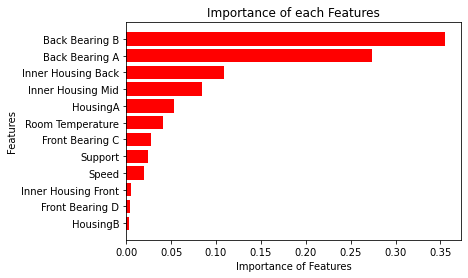

In [53]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [54]:
model.score(x_test,y_test)

0.9201395647338206

In [55]:
model.score(x_train,y_train)

0.920724577563956

In [56]:
import pandas as pd
data_x= pd.read_csv("Data_random.csv")
data_n=pd.read_csv("Data_random.csv",usecols=[0,1,2,3,4,5,6,7,8,9,10,12])

In [59]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(8)
x=data2
y=data.Deformation
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.2)

In [60]:
model.score(x_test_1,y_test_1)

0.9205263507825309

In [ ]:
X_new = [[30.67,30.31,30.09,30.33,30.04,30.24,30.5,30.35,30.35,28.3,30.03,3000]]  # Cyprus' GDP per capita
print(rfc.predict(X_new))